In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [33]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Overall Stats

In [36]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [37]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### To drop unnecessary features 

In [39]:
data = data.drop(['RowNumber' ,'CustomerId', 'Surname'] , axis = 1 )
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding categorical data

In [41]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [42]:
data = pd.get_dummies(data, drop_first=True)
data = data.astype(int)  

In [43]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [56]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_34583/3046541715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data= data, palette="pastel")


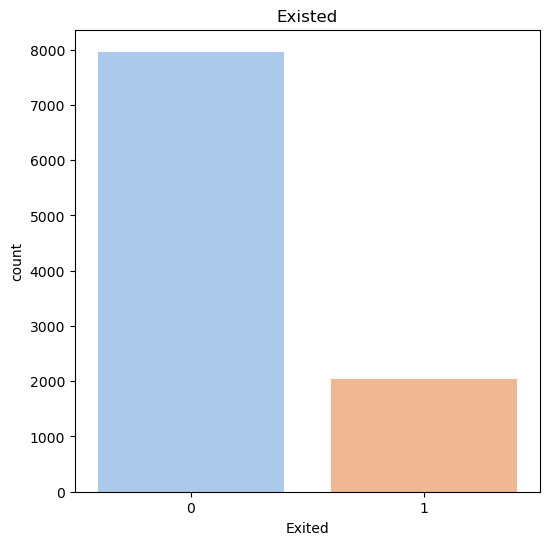

In [58]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Exited', data= data, palette="pastel")  
plt.title('Existed')
plt.show()

	•	Exited = 1 → The customer left the bank (churned).
	•	Exited = 0 → The customer stayed with the bank.


### imbalanced

In [61]:
X = data.drop('Exited', axis=1)
y = data['Exited']

### Handling imbalanced data with SMOTE

-- Synthetic Minority Over-sampling Technique

In [106]:
from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE().fit_resample(X, y)


In [108]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

-- Exited

-- 0    7963

-- 1    2037

-- Name: count, dtype: int64

##### Before resampling using SMOTE

## Split the dataset into training and test dataset 

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res , test_size=0.20, random_state=42)

### Feature Scaling

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [117]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)


In [119]:
X_train

array([[ 0.24124556, -0.50101672, -1.38974044, ...,  1.73823607,
        -0.46275562, -0.84238243],
       [ 1.09326636,  0.09717015, -1.38974044, ..., -0.57529585,
        -0.46275562,  1.18710928],
       [ 0.82018277,  0.19686796,  1.18589605, ..., -0.57529585,
        -0.46275562,  1.18710928],
       ...,
       [ 0.19755218,  0.19686796,  1.18589605, ..., -0.57529585,
        -0.46275562,  1.18710928],
       [-0.58892855,  2.19082419, -1.02179237, ..., -0.57529585,
        -0.46275562, -0.84238243],
       [ 0.52525249,  0.99445045, -1.38974044, ...,  1.73823607,
        -0.46275562,  1.18710928]])

## Using different classification algorithm 

### Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()


In [123]:
log.fit(X_train,y_train)  # train the model 

LogisticRegression()

In [125]:
y_pred1 = log.predict (X_test)  # perform prediction

In [127]:
from sklearn.metrics import accuracy_score 

In [88]:
accuracy_score(y_test,y_pred1) #(actualvalue , predicted value)

### BEFORE SMOTE 

0.808

In [129]:
accuracy_score(y_test,y_pred1) #(actual value , predicted value)


### AFTER SMOTE 

0.790646578782172

### it's not safe to use accuracy_score as a metric on imbalanced dataset 

### For the data being imbalanced , we can check precision , recall and F1 score as well 

In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_pred1)  # BEFORE

0.5891472868217055

In [131]:
precision_score(y_test, y_pred1) # AFTER 

0.7761845386533666

In [95]:
recall_score(y_test, y_pred1)  # BEFORE

0.18673218673218672

In [133]:
recall_score(y_test, y_pred1)  # AFTER

0.8016741790083709

In [97]:
f1_score(y_test, y_pred1)    # BEFORE

0.2835820895522388

In [135]:
f1_score(y_test, y_pred1)    # AFTER

0.7887234716503009

### SVC

In [138]:
from sklearn import svm

svm = svm.SVC()


In [140]:
svm.fit(X_train, y_train)


SVC()

In [141]:
y_pred2 = svm.predict(X_test)

In [144]:
accuracy_score(y_test, y_pred2)

0.8443188951663528

In [146]:
precision_score(y_test, y_pred2) 

0.8351299936588459

### KNeighborsClassifier

In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [151]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [153]:
y_pred3 = knn.predict(X_test)

In [155]:
accuracy_score(y_test, y_pred3)

0.8217200251098556

In [157]:
precision_score(y_test, y_pred3) 

0.8004881025015254

### DecisionTreeClassifier

In [160]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [162]:
y_pred4 = dt.predict(X_test)

In [164]:
accuracy_score(y_test, y_pred4)

0.7966101694915254

In [166]:
precision_score(y_test, y_pred4) 

0.7767584097859327

### RandomForestClassifier

In [169]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)


RandomForestClassifier()

In [171]:
y_pred5 = rf.predict(X_test)

accuracy_score(y_test, y_pred5)

0.8631512868801005

In [173]:
precision_score(y_test, y_pred5) 

0.8514789175582127

### Gradient Boosting Classifier

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [178]:
y_pred6 = gbc.predict(X_test)


In [180]:
accuracy_score(y_test, y_pred6)

0.8483992467043314

In [182]:
precision_score(y_test, y_pred6) 

0.8394670050761421

### Compare the performance (

In [187]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
    'ACC': [accuracy_score(y_test, y_pred1),
            accuracy_score(y_test, y_pred2),
            accuracy_score(y_test, y_pred3),
            accuracy_score(y_test, y_pred4),
            accuracy_score(y_test, y_pred5),
            accuracy_score(y_test, y_pred6)]
})

In [189]:
final_data

,Models,ACC
0,LR,0.790647
1,SVC,0.844319
2,KNN,0.821720
3,DT,0.796610
4,RF,0.863151
5,GBC,0.848399


/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_34583/2372182137.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_data['Models'], y=final_data['ACC'], palette='viridis')


<Axes: xlabel='Models', ylabel='ACC'>

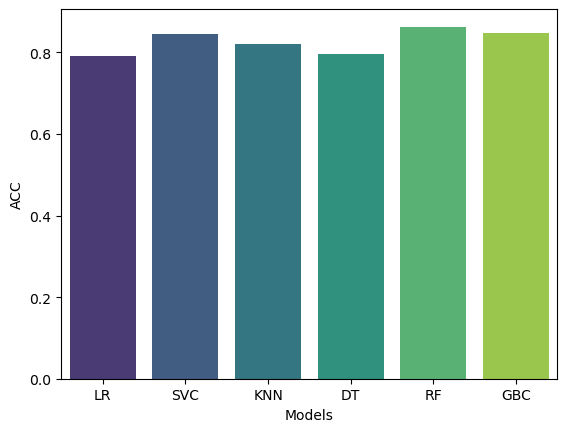

In [193]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'], palette='viridis')

## Save the model 

In [197]:
X_res = sc.fit_transform(X_res)

rf.fit(X_res, y_res) # random forest classifier



RandomForestClassifier()

In [199]:
import joblib

In [201]:
joblib.dump( rf , 'churn_predict_model')

['churn_predict_model']

In [203]:
model = joblib.load('churn_predict_model')

In [205]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,1
9997,709,36,7,0,1,0,1,42085,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,0,1


In [209]:
result = model.predict([[502,42,8,159660,3,1,0,113931,0,0,0]])

if result==1:
    print("Customer can leave.")
else:
    print("Customer can stay.")

Customer can leave.
